In [1]:
from MongoDb import MongoDb
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import OrderedDict

db = MongoDb('mongodb://localhost:27017')

In [2]:
#find only these scratch cards which still have main prize to win
data = list(db.scratch_cards.find({}))
cards = [card for card in data if card['wins_left'][0] > 0]

<BarContainer object of 28 artists>

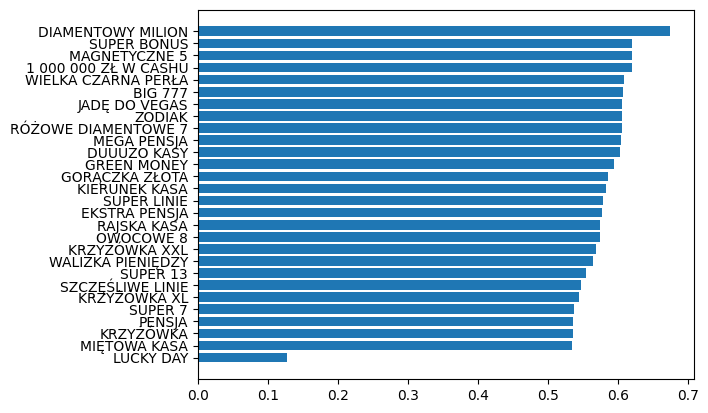

In [3]:
# potential return by spending 1 zloty on a given scratch card
result = {}
for card in cards:
    wins_left_overall_ratio = np.zeros(len(card['n_wins'])-2, dtype=np.float16)
    for i, (n_wins, wins_left) in enumerate(zip(card['n_wins'][2:], card['wins_left'][2:])):
        wins_left_overall_ratio[i] = (wins_left/n_wins)
    estimated_circ_remaining = math.ceil(card['circulation']*np.average(wins_left_overall_ratio))
    #print(card['name'], card["pot"]/estimated_circ_remaining, card['scratch_price'])
    result[card['name']] = (card["pot"]/estimated_circ_remaining) / card['scratch_price']

keys = list(result.keys())
values = list(result.values())
sorted_value_index = np.argsort(values) 
sorted_dict = {keys[i]: values[i] for i in sorted_value_index}

plt.barh(list(sorted_dict.keys()), sorted_dict.values())